**Import libraries**

In [334]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import os


# Data Loading and Exploration | Cleaning

In [335]:
df = pd.read_csv('nofluffjobs_Dec24.csv')
df.head(21)


,Job Title,Location,Minimum Salary,Maximum Salary,Technologies,Company,Seniority Level,Job Link
0,Not specified,Zdalnie,Not specified,Not specified,"Backend, Python, Asyncio, Twisted",OpenVPN,Senior,https://nofluffjobs.com/pl/job/senior-python-e...
1,Not specified,Zdalnie,Not specified,Not specified,"Backend, Python, FastAPI, Django",First Derivative,Senior,https://nofluffjobs.com/pl/job/mid-senior-pyth...
2,Not specified,Zdalnie,Not specified,Not specified,"Backend, Python, Django, Relational database",Milo Solutions OÜ,Senior,https://nofluffjobs.com/pl/job/senior-python-d...
3,Not specified,Zdalnie,Not specified,Not specified,"Fullstack, Python, JavaScript, API",Link Group,Mid,https://nofluffjobs.com/pl/job/full-stack-engi...
4,Not specified,Zdalnie,Not specified,Not specified,"Backend, Python, AI, .NET",Euvic S.A.,Senior,https://nofluffjobs.com/pl/job/senior-ai-devel...
5,Not specified,Warszawa,Not specified,Not specified,"Backend, Python, FastAPI, NoSQL",Atende Industries Sp. z o.o.,Senior,https://nofluffjobs.com/pl/job/starszy-program...
6,Not specified,Zdalnie,Not specified,Not specified,"Backend, Python, Django, REST API",Infogain Technologies Sp. z o.o.,Senior,https://nofluffjobs.com/pl/job/senior-software...
7,Not specified,Zdalnie,Not specified,Not specified,"Backend, Python, Degree, Unit testing",HBM,Senior,https://nofluffjobs.com/pl/job/senior-python-d...
8,Not specified,Zdalnie,Not specified,Not specified,"Fullstack, Python, React, JavaScript",Order Group,Mid,https://nofluffjobs.com/pl/job/fullstack-devel...
9,Not specified,Zdalnie,Not specified,Not specified,"Backend, Python, HTML, CSS",SNI,Senior,https://nofluffjobs.com/pl/job/senior-python-d...


In [336]:
df.tail(2)

,Job Title,Location,Minimum Salary,Maximum Salary,Technologies,Company,Seniority Level,Job Link
438,Junior Cyber Defense Specialist,Kraków,7 000,11 000,"Security, Python, Information Security, SoC",Motorola Solutions Systems Polska,Junior,https://nofluffjobs.com/pl/job/junior-cyber-de...
439,Java Software Engineer - Remote NOWA,Zdalnie,12 750,23 000,"Testing, Python, Java, Spring Boot",CodiLime,Mid,https://nofluffjobs.com/pl/job/java-software-e...


#### **Remove first 20 empty velues**

In [337]:
df = df.iloc[20:]
df.head(2)

,Job Title,Location,Minimum Salary,Maximum Salary,Technologies,Company,Seniority Level,Job Link
20,Senior Python Backend Developer,Łódź,Not specified,Not specified,"Backend, Python, Git, REST",ELESTER Sp z o.o.,Senior,https://nofluffjobs.com/pl/job/senior-python-b...
21,Python Developer (with Wowza experience),Zdalnie,21 840,25 200,"Backend, Python, AWS, Node.js",7N,Mid,https://nofluffjobs.com/pl/job/python-develope...


#### **Remove job links**

In [338]:
df = df.drop(columns=['Job Link'])
df.head(2)

,Job Title,Location,Minimum Salary,Maximum Salary,Technologies,Company,Seniority Level
20,Senior Python Backend Developer,Łódź,Not specified,Not specified,"Backend, Python, Git, REST",ELESTER Sp z o.o.,Senior
21,Python Developer (with Wowza experience),Zdalnie,21 840,25 200,"Backend, Python, AWS, Node.js",7N,Mid


#### **Empty values check**

In [339]:
def check_missing_values(column):
    nan_percentage = df[column].isnull().sum() / df[column].size
    print(f'"{column}" column consists of {nan_percentage:.2%} missing values.')

for column in df.columns:
    check_missing_values(column)

"Job Title" column consists of 0.00% missing values.
"Location" column consists of 0.00% missing values.
"Minimum Salary" column consists of 0.00% missing values.
"Maximum Salary" column consists of 0.00% missing values.
"Technologies" column consists of 0.00% missing values.
"Company" column consists of 0.00% missing values.
"Seniority Level" column consists of 0.00% missing values.


#### **Droping "Not specified" values**

In [340]:
df = df[(df['Minimum Salary'] != 'Not specified') & (df['Maximum Salary'] != 'Not specified')]


#### **Duplicates check**

In [341]:
df.duplicated().sum() 


np.int64(1)

# Data preparation

#### **Data types**

In [342]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 21 to 439
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        304 non-null    object
 1   Location         304 non-null    object
 2   Minimum Salary   304 non-null    object
 3   Maximum Salary   304 non-null    object
 4   Technologies     304 non-null    object
 5   Company          304 non-null    object
 6   Seniority Level  304 non-null    object
dtypes: object(7)
memory usage: 19.0+ KB


In [343]:
df.describe()

,Job Title,Location,Minimum Salary,Maximum Salary,Technologies,Company,Seniority Level
count,304,304,304,304,304,304,304
unique,271,22,104,118,278,157,6
top,Senior Data Engineer,Zdalnie,20 000,25 200,"DevOps, Python, AWS, Terraform",Link Group,Senior
freq,8,183,14,14,4,17,175


#### **Changing Dtype for min & max salary**

In [344]:
#remove /xa0 spaces between values
df['Minimum Salary'] = pd.to_numeric(df['Minimum Salary'].replace({r'\s+': '', r'\xa0': ''}, regex=True), errors='coerce')
df['Maximum Salary'] = pd.to_numeric(df['Maximum Salary'].replace({r'\s+': '', r'\xa0': ''}, regex=True), errors='coerce')

#float to int
df['Minimum Salary'] = df['Minimum Salary'].astype('Int64')
df['Maximum Salary'] = df['Maximum Salary'].astype('Int64')


df = df.dropna(subset=['Minimum Salary', 'Maximum Salary'])
df.to_csv('../Data/prepared_nofluffjobs.csv', index=False) # edited df for next steps


In [345]:
df.head()

,Job Title,Location,Minimum Salary,Maximum Salary,Technologies,Company,Seniority Level
21,Python Developer (with Wowza experience),Zdalnie,21840,25200,"Backend, Python, AWS, Node.js",7N,Mid
23,"Senior Python Engineer, (monolith decompositio...",Zdalnie,27000,30000,"Backend, Python, Django, RabbitMQ",PandaDoc,Senior
25,Senior Python Developer (Digital Healthcare),Zdalnie,10643,21286,"Backend, Python, Security, FastAPI",RemoteBranch.io,Senior
27,Senior Python Developer,Kraków,20000,25000,"Backend, Python, pandas, NumPy",HSBC Technology Poland,Senior
29,Python Developer (AI/genAI),Zdalnie,18000,22000,"Backend, Python, FastAPI, NoSQL",Deviniti,Mid


In [346]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 21 to 439
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        303 non-null    object
 1   Location         303 non-null    object
 2   Minimum Salary   303 non-null    Int64 
 3   Maximum Salary   303 non-null    Int64 
 4   Technologies     303 non-null    object
 5   Company          303 non-null    object
 6   Seniority Level  303 non-null    object
dtypes: Int64(2), object(5)
memory usage: 19.5+ KB


# Analysis


**Goals:**
1. **📊 Analysis of Technology Popularity**
   - Exploring trends and demand for different technologies.
2. **💰 Analysis of Salary Levels in the Industry**
   - Comparing compensation for various roles and skillsets.
3. **🔍 Searching for Correlations in the Data**
   - Identifying patterns and relationships between variables.
4. **📈 Graphical Representation of the Data**
   - Visualizing findings through graphs and charts.

## The most popular technologies and Skills mentioned in job postings

In [347]:
technologies_series = df['Technologies'].str.split(',').explode().str.strip()

technology_popularity = technologies_series.value_counts()
technology_popularity.head(10)


Technologies
Python       303
Data          79
DevOps        54
Backend       40
AWS           39
SQL           37
Testing       31
Fullstack     28
Azure         21
AI/ML         20
Name: count, dtype: int64

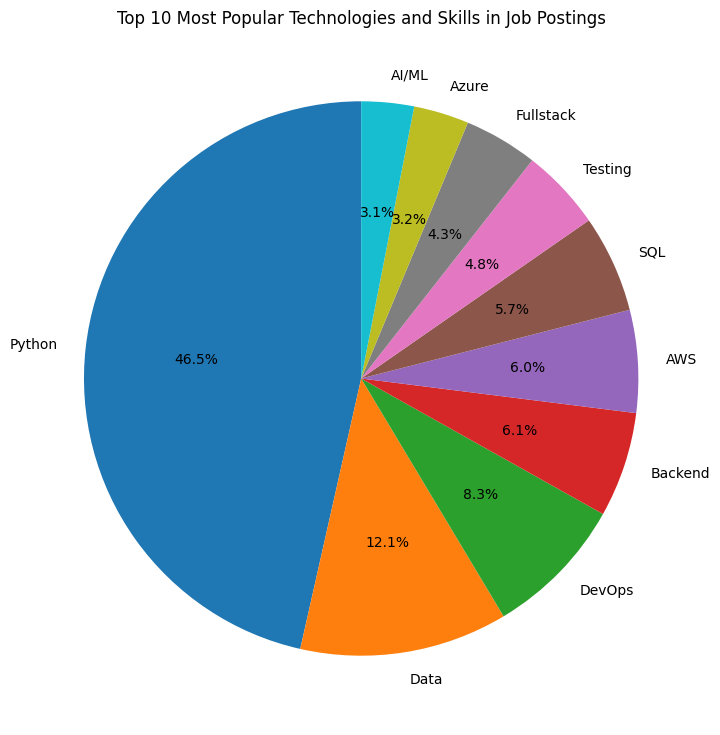

In [348]:
plt.figure(figsize=(13, 9))
technology_popularity.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Top 10 Most Popular Technologies and Skills in Job Postings')
plt.ylabel('')  
plt.show()

## Salary Levels in the Industry

In [349]:
df['Average Salary'] = (df['Minimum Salary'] + df['Maximum Salary']) / 2
df_exploded = df.assign(Technologies=df['Technologies'].str.split(', ')).explode('Technologies')

salary_stats = df[['Minimum Salary', 'Maximum Salary', 'Average Salary']].describe()

salary_by_seniority = df.groupby('Seniority Level')[['Average Salary']].mean()

salary_by_location = df.groupby('Location')['Minimum Salary'].mean().sort_values(ascending=False)

salary_by_company = df.groupby('Company')['Minimum Salary'].mean().sort_values(ascending=False)

salary_by_technology = df_exploded.groupby('Technologies')['Minimum Salary'].mean().sort_values(ascending=False)


#### **Statistical Summary of Salary Data**

In [350]:
salary_stats

,Minimum Salary,Maximum Salary,Average Salary
count,303.0,303.0,303.0
mean,20210.349835,26119.425743,23164.887789
std,6796.006672,7703.303666,7030.54856
min,5000.0,5500.0,5250.0
25%,15230.0,21840.0,18490.0
50%,20160.0,26000.0,23500.0
75%,25200.0,30240.0,27720.0
max,39293.0,54000.0,44500.0


#### **Average Salary due to Seniority Level**

In [351]:
salary_by_seniority

,Average Salary
Seniority Level,
Expert,27462.705882
Junior,9820.0
Mid,19499.855
Senior,25703.825714
Trainee,5740.0


<Figure size 1000x600 with 0 Axes>

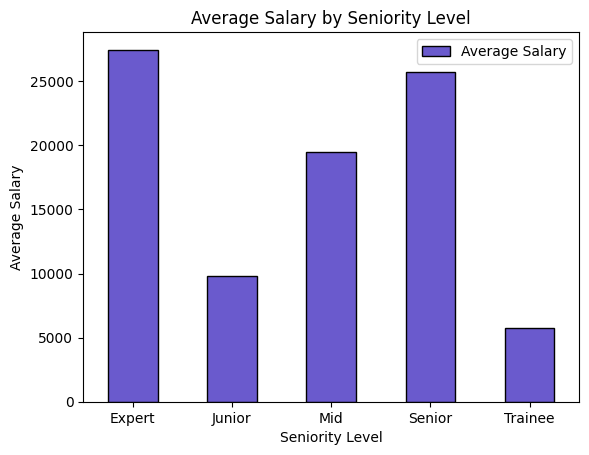

In [352]:
plt.figure(figsize=(10, 6))
salary_by_seniority.plot(kind='bar', color='slateblue', edgecolor='black')
plt.title('Average Salary by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

#### **Average Salary due to Location**

In [353]:
salary_by_location

Location
warszawa              30000.0
Cracow                26880.0
Krakow                25200.0
Białystok             24000.0
Poznań                23520.0
Wrocław          22183.333333
Gdańsk                21152.5
Zdalnie          20972.874317
Warsaw               20843.75
Warszawa         20536.129032
Bielsko-Biała         19000.0
Gdynia           17453.333333
Kraków           17308.285714
Szczecin              16740.0
Berlin                16102.5
Gliwice               15000.0
Londyn                14240.0
Zabierzów             14000.0
Łódź                  13870.0
Katowice              11500.0
Mielec                10000.0
Zielona Góra           7900.0
Name: Minimum Salary, dtype: Float64

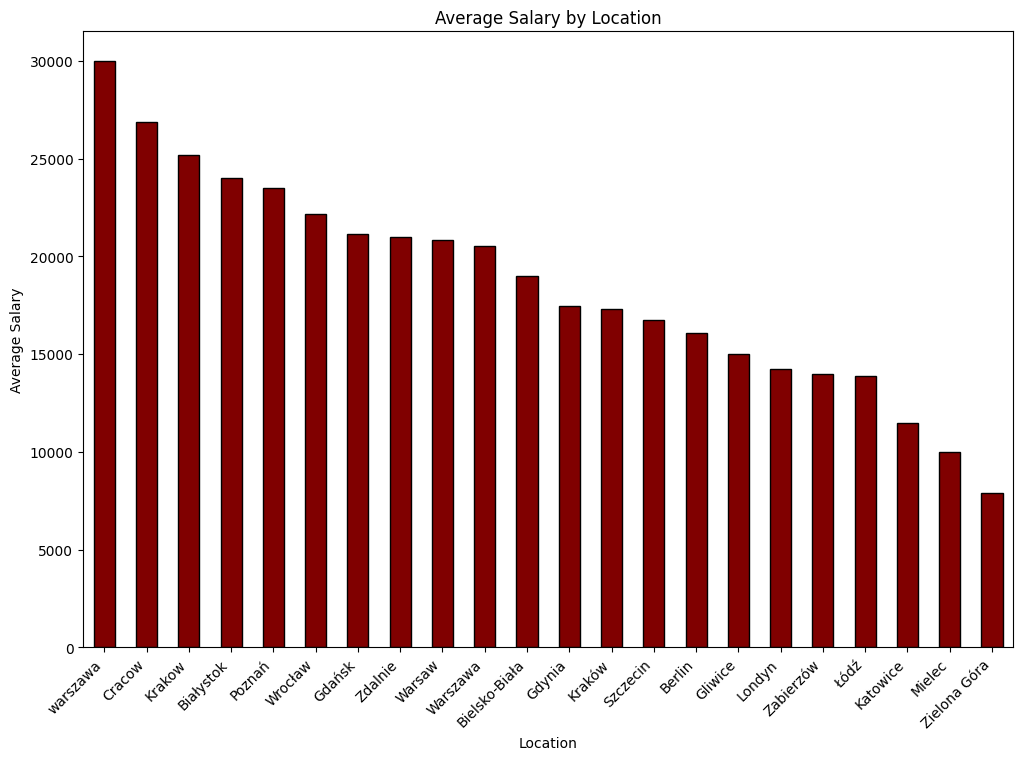

In [354]:
plt.figure(figsize=(12, 8))
salary_by_location.plot(kind='bar', color='maroon', edgecolor='black')
plt.title('Average Salary by Location')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### **Average Salary due to Company**

In [355]:
top_5_highest = salary_by_company.head(5)
top_5_lowest = salary_by_company.tail(5)

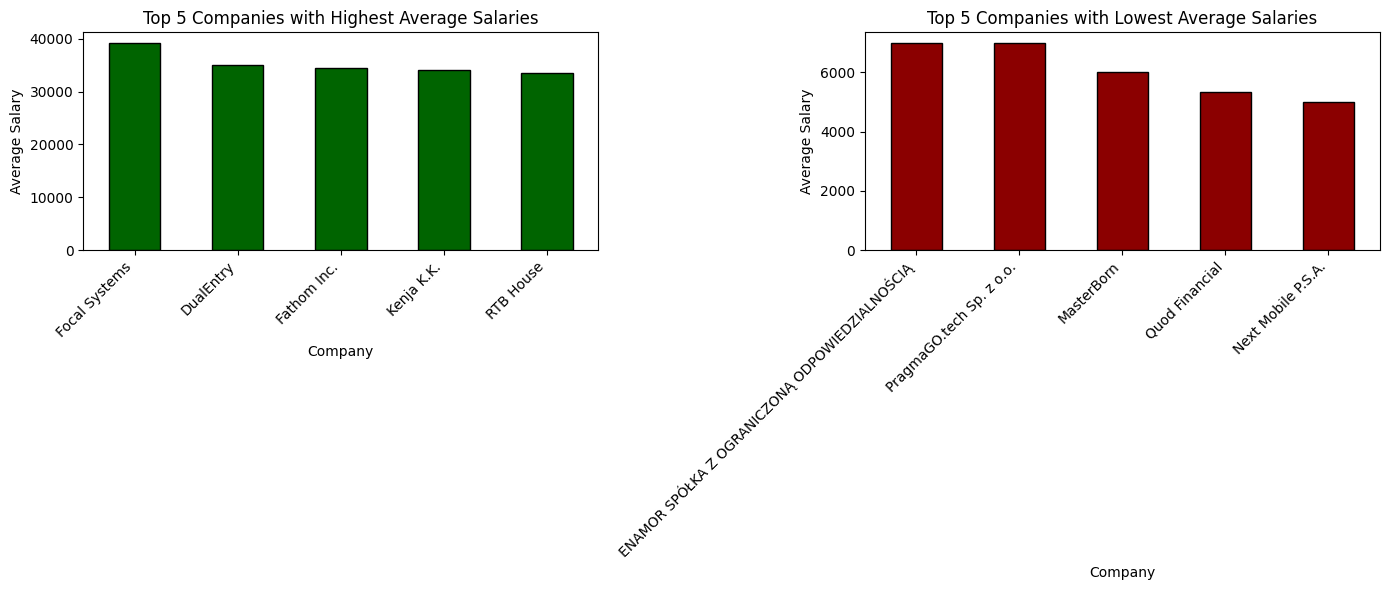

In [356]:
plt.figure(figsize=(14, 6))

# Top 5 highest salaries
plt.subplot(1, 2, 1)
top_5_highest.plot(kind='bar', color='darkgreen', edgecolor='black')
plt.title('Top 5 Companies with Highest Average Salaries')
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')

# Top 5 lowest salaries
plt.subplot(1, 2, 2)
top_5_lowest.plot(kind='bar', color='darkred', edgecolor='black')
plt.title('Top 5 Companies with Lowest Average Salaries')
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


#### **Average Salary due to Technology or Skill**

In [357]:
top_5_highest_tech = salary_by_technology.head(5)
top_5_lowest_tech = salary_by_technology.tail(5)

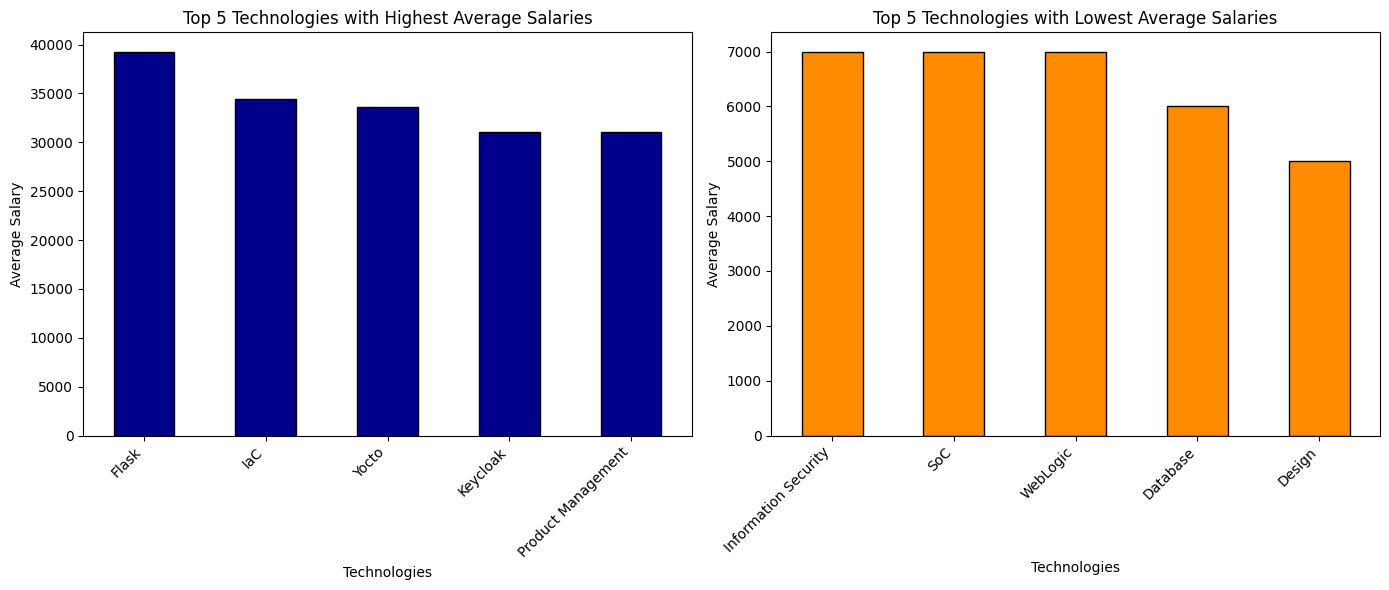

In [358]:
plt.figure(figsize=(14, 6))

# Top 5 highest salaries
plt.subplot(1, 2, 1)
top_5_highest_tech.plot(kind='bar', color='darkblue', edgecolor='black')
plt.title('Top 5 Technologies with Highest Average Salaries')
plt.xlabel('Technologies')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')

# Top 5 lowest salaries
plt.subplot(1, 2, 2)
top_5_lowest_tech.plot(kind='bar', color='darkorange', edgecolor='black')
plt.title('Top 5 Technologies with Lowest Average Salaries')
plt.xlabel('Technologies')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### **Distribution of Average Salary**

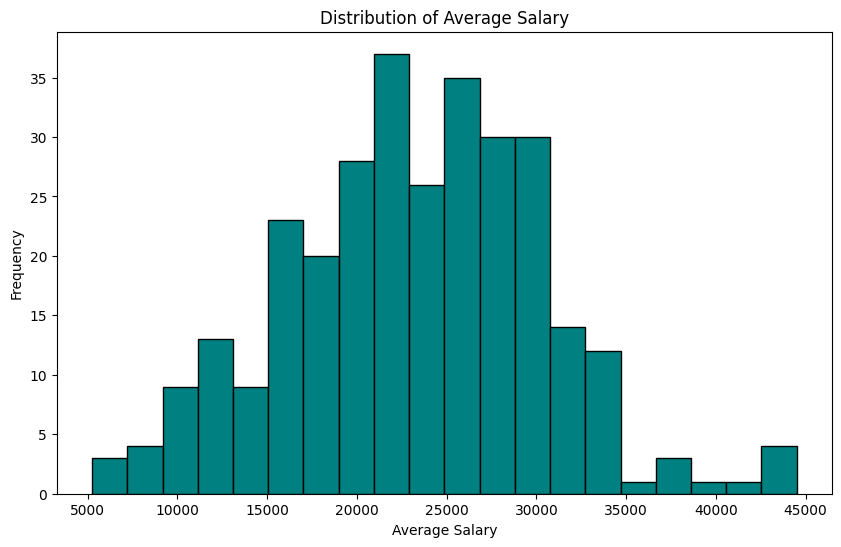

In [359]:
plt.figure(figsize=(10, 6))
df['Average Salary'].plot(kind='hist', bins=20, color='teal', edgecolor='black')
plt.title('Distribution of Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.show()

## Correlations in the Data

1. **Encodes categorical features** into numerical values for analysis.  
2. **Computes a correlation matrix** to explore relationships between features.  
3. **Visualizes correlations** using a heatmap for better insights.

In [360]:
df = df.drop(columns=['Minimum Salary', 'Maximum Salary'])

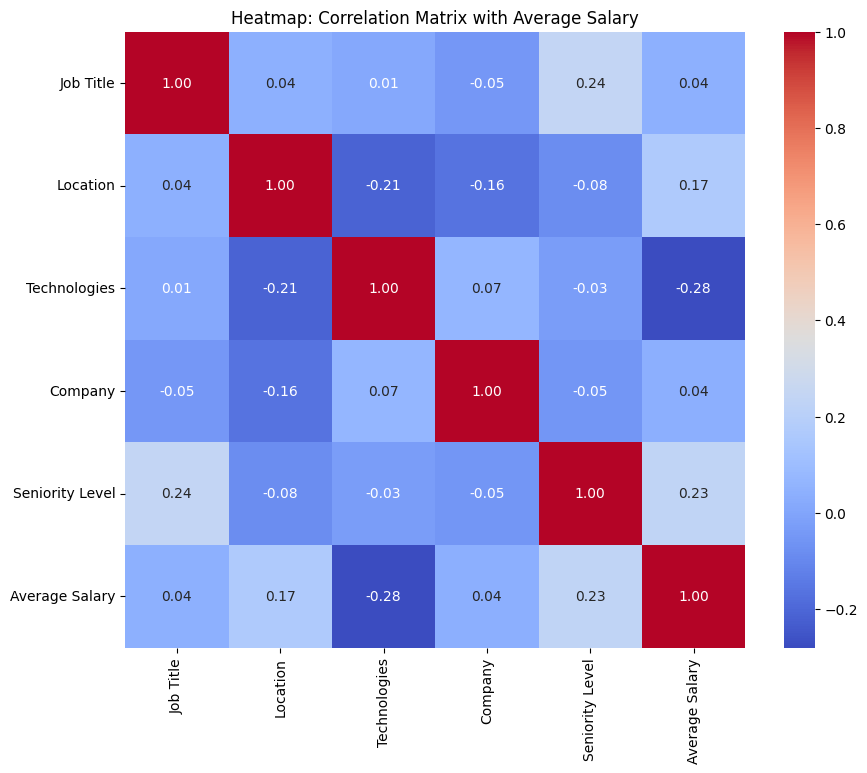

In [361]:

df_encoded = df.copy()
categorical_columns = ['Job Title', 'Location', 'Technologies', 'Company', 'Seniority Level']
encoder = LabelEncoder()
for column in categorical_columns:
    df_encoded[column] = encoder.fit_transform(df_encoded[column])


correlation_matrix = df_encoded.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap: Correlation Matrix with Average Salary')
plt.show()

### Interpretation of the Heatmap

Based on the heatmap, we observe the following correlations:

1. **Negative correlation** between **Average Salary** and the knowledge of required technologies for the job. This suggests that certain technologies, such as Excel, are associated with lower salaries, while more in-demand technologies, like Python, tend to result in higher salaries.
2. **Positive correlation** with **Seniority Level** and **Location**, indicating that higher seniority levels and certain locations are associated with higher average salaries.
3. **Near-zero correlation** for **Job Title** and **Company**, implying that these factors do not significantly impact the average salary.